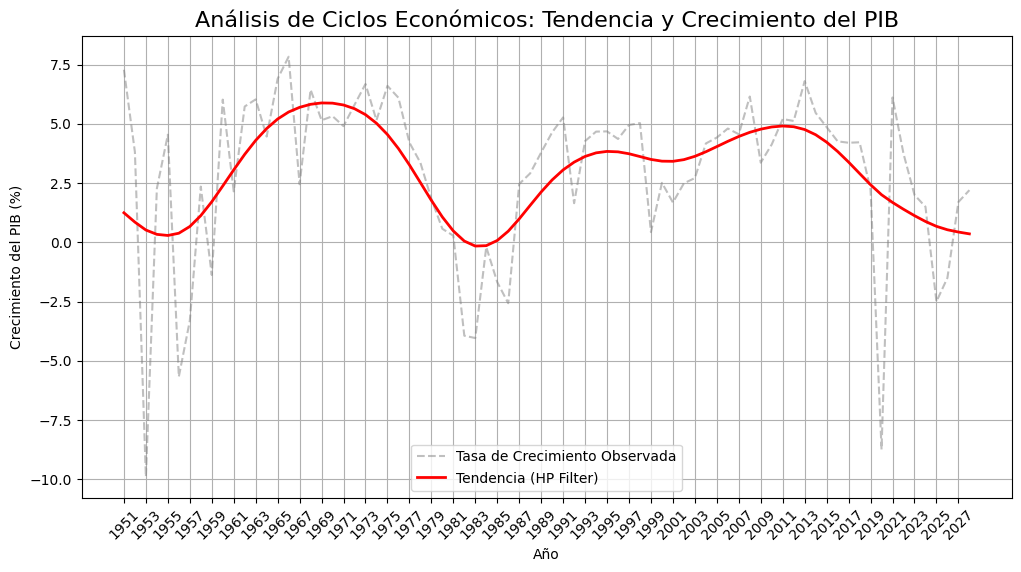

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

# 1. Conectar a la base de datos y cargar los datos de la tasa de crecimiento del PIB
conn = sqlite3.connect("../../db/proyectomacro.db")
df = pd.read_sql_query("SELECT Año, Crecimiento FROM tasa_crecimiento_pib", conn)
conn.close()
# 2. Agregar los nuevos datos al DataFrame original
nuevos_datos = pd.DataFrame({
    "año": [2025, 2026, 2027,2028],
    "crecimiento": [-2.5, -1.5, 1.7,2.2]  # Tasa de crecimiento hipotética
})

df = pd.concat([df, nuevos_datos], ignore_index=True)

# 3. Aplicar el Filtro de Hodrick-Prescott
# Lambda recomendado para datos anuales es 100
ciclo, tendencia = hpfilter(df["crecimiento"], lamb=100)
df["Tendencia"] = tendencia
df["Ciclo"] = ciclo

# 4. Graficar la Tasa de Crecimiento Observada y la Tendencia
plt.figure(figsize=(12, 6))
plt.plot(df["año"], df["crecimiento"], label="Tasa de Crecimiento Observada", color="gray", linestyle="--", alpha=0.5)
plt.plot(df["año"], df["Tendencia"], label="Tendencia (HP Filter)", color="red", linewidth=2)
plt.xlabel("Año")
plt.ylabel("Crecimiento del PIB (%)")
plt.title("Análisis de Ciclos Económicos: Tendencia y Crecimiento del PIB", fontsize=16)
plt.legend()
plt.grid(True)
plt.xticks(df['año'][::2], rotation=45)
plt.show()



In [13]:
df.tail()

,año,crecimiento,Tendencia,Ciclo
73,2024,1.5,1.059004,0.440996
74,2025,0.5,0.808272,-0.308272
75,2026,-1.4,0.575416,-1.975416
76,2027,0.7,0.366535,0.333465
77,2028,1.2,0.167975,1.032025
